In [ ]:
# Artificial Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# pip install tensorflow

# Installing Keras
# pip install --upgrade keras

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape,y_train.shape)

(8000, 10) (8000,)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train.shape,X_test.shape)

(8000, 10) (2000, 10)


Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.4865 - accuracy: 0.7958
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4332 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4262 - accuracy: 0.7981
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4217 - accuracy: 0.8210
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4198 - accuracy: 0.8285
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4177 - accuracy: 0.8304
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8316
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4148 - accuracy: 0.8329
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4129 - accuracy: 0.8324
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4116 - accura

Text(0.5, 1.0, 'Test accuracy: 39.7 %')

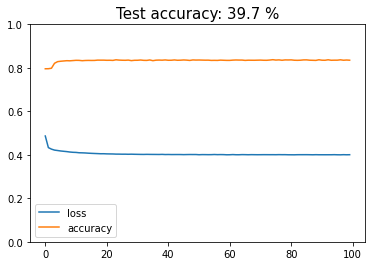

In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

import keras.backend as k 

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


history = classifier.fit(X_train,y_train,epochs=100,batch_size = 10)
result = classifier.evaluate(X_test,y_test)

historydf = pd.DataFrame(history.history,index=history.epoch)
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[0]*100),fontsize=15)

#Loss Functions

In [ ]:
dflist = []

loss_functions = ['binary_crossentropy','hinge','squared_hinge']

for ls in loss_functions:

    k.clear_session()
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = ls, metrics = ['accuracy'])

    h = classifier.fit(X_train,y_train,epochs=25,batch_size=16,verbose=1)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))   

Epoch 1/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5114 - accuracy: 0.7956
Epoch 2/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4338 - accuracy: 0.7960
Epoch 3/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4291 - accuracy: 0.7960
Epoch 4/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4256 - accuracy: 0.7960
Epoch 5/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4224 - accuracy: 0.8121
Epoch 6/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4200 - accuracy: 0.8226
Epoch 7/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4185 - accuracy: 0.8270
Epoch 8/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4170 - accuracy: 0.8290
Epoch 9/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4157 - accuracy: 0.8314
Epoch 10/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4144 - accuracy: 0.8322

In [ ]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([loss_functions,metrics_reported],names=['loss_functions','metric'])

historydf.shape
idx.shape


historydf.columns = idx

print(historydf)



loss_functions binary_crossentropy            ... squared_hinge          
metric                        loss  accuracy  ...          loss  accuracy
0                         0.511412  0.795625  ...      1.293046  0.795875
1                         0.433824  0.796000  ...      1.004637  0.796000
2                         0.429116  0.796000  ...      0.999365  0.796000
3                         0.425586  0.796000  ...      0.997038  0.796000
4                         0.422364  0.812125  ...      0.994253  0.796000
5                         0.420043  0.822625  ...      0.990885  0.796000
6                         0.418466  0.827000  ...      0.986943  0.796000
7                         0.416951  0.829000  ...      0.982792  0.796000
8                         0.415745  0.831375  ...      0.979821  0.795875
9                         0.414356  0.832250  ...      0.978152  0.818375
10                        0.413046  0.832875  ...      0.977163  0.821750
11                        0.412043  0.

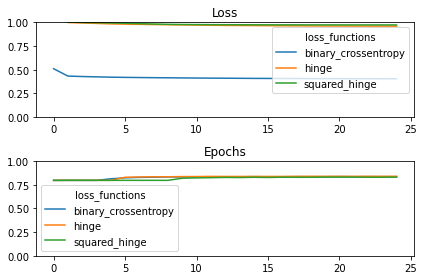

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Loss")
	
ax = plt.subplot(212)
historydf.xs('accuracy',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Accuracy")
plt.title("Epochs")

plt.tight_layout()

# Learning Rates

In [ ]:
dflist = []

learning_rates = [0.01,0.05,0.10,0.5]

for lr in learning_rates:

    k.clear_session()
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    h = classifier.fit(X_train,y_train,epochs=25,batch_size=16,verbose=1)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))   



Epoch 1/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5464 - accuracy: 0.7949
Epoch 2/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4378 - accuracy: 0.7960
Epoch 3/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4341 - accuracy: 0.7960
Epoch 4/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4318 - accuracy: 0.7960
Epoch 5/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4287 - accuracy: 0.7960
Epoch 6/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4260 - accuracy: 0.7960
Epoch 7/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4236 - accuracy: 0.8031
Epoch 8/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4216 - accuracy: 0.8213
Epoch 9/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4201 - accuracy: 0.8248
Epoch 10/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4191 - accuracy: 0.8276

In [ ]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates,metrics_reported],names=['learning_rate','metric'])

historydf.shape
idx.shape


historydf.columns = idx

print(historydf)


learning_rate      0.01                0.05  ...      0.10      0.50          
metric             loss  accuracy      loss  ...  accuracy      loss  accuracy
0              0.546373  0.794875  0.515424  ...  0.796125  0.528302  0.795125
1              0.437837  0.796000  0.434033  ...  0.796000  0.425164  0.809125
2              0.434106  0.796000  0.429791  ...  0.796000  0.413906  0.821875
3              0.431809  0.796000  0.426096  ...  0.796250  0.405036  0.825000
4              0.428748  0.796000  0.423193  ...  0.821000  0.397200  0.825375
5              0.426012  0.796000  0.421791  ...  0.824375  0.390872  0.828375
6              0.423558  0.803125  0.420041  ...  0.828125  0.385766  0.829250
7              0.421640  0.821250  0.418503  ...  0.828500  0.381704  0.838000
8              0.420115  0.824750  0.417667  ...  0.830750  0.378028  0.840000
9              0.419057  0.827625  0.416031  ...  0.831375  0.375111  0.842750
10             0.417917  0.829625  0.414938  ...  0.

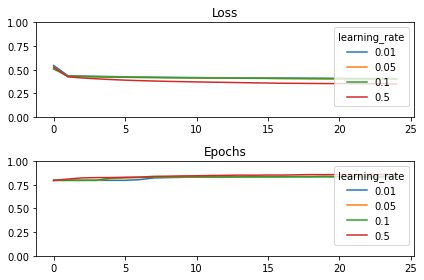

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Loss")
	
ax = plt.subplot(212)
historydf.xs('accuracy',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Accuracy")
plt.title("Epochs")

plt.tight_layout()

# Batch sizes

In [ ]:
dflist = []

batch_sizes = [16,32,64,128]

for bs in batch_sizes:

    k.clear_session()
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    h = classifier.fit(X_train,y_train,epochs=25,batch_size=bs,verbose=1)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))   


Epoch 1/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5119 - accuracy: 0.7955
Epoch 2/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4333 - accuracy: 0.7960
Epoch 3/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4277 - accuracy: 0.7960
Epoch 4/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4236 - accuracy: 0.8076
Epoch 5/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4209 - accuracy: 0.8226
Epoch 6/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4193 - accuracy: 0.8257
Epoch 7/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4169 - accuracy: 0.8278
Epoch 8/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4159 - accuracy: 0.8310
Epoch 9/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4144 - accuracy: 0.8319
Epoch 10/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4134 - accuracy: 0.8310

In [ ]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes,metrics_reported],names=['batch_size','metric'])

historydf.columns = idx

print(historydf)

batch_size       16                  32   ...       64        128          
metric          loss  accuracy      loss  ...  accuracy      loss  accuracy
0           0.511912  0.795500  0.572208  ...  0.796250  0.680418  0.791750
1           0.433349  0.796000  0.437860  ...  0.796000  0.623925  0.796000
2           0.427719  0.796000  0.428873  ...  0.796000  0.519076  0.796000
3           0.423594  0.807625  0.424554  ...  0.796000  0.459641  0.796000
4           0.420944  0.822625  0.421467  ...  0.796000  0.446695  0.796000
5           0.419259  0.825750  0.418680  ...  0.796000  0.441911  0.796000
6           0.416933  0.827750  0.415812  ...  0.796000  0.438378  0.796000
7           0.415850  0.831000  0.413805  ...  0.796000  0.434824  0.796000
8           0.414363  0.831875  0.411598  ...  0.796000  0.431049  0.796000
9           0.413412  0.831000  0.410512  ...  0.796000  0.427191  0.796000
10          0.411730  0.832375  0.408709  ...  0.796000  0.423586  0.796000
11          

Text(0.5, 1.0, 'Epochs')

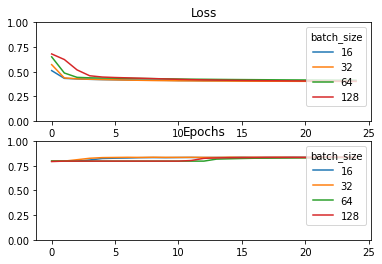

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Loss")
	
ax = plt.subplot(212)
historydf.xs('accuracy',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Accuracy")
plt.title("Epochs")

# Optimizers

In [ ]:
#from keras.optimizers import SGD,Adam,Adagrad,RMSprop

from tensorflow import keras
from tensorflow.keras import layers



dflist = []



optimizers = ['keras.optimizers.SGD()',
		'keras.optimizers.Adam()','keras.optimizers.Adagrad()', 'keras.optimizers.RMSprop()']



for opt_name in optimizers:

    k.clear_session()
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = eval(opt_name), loss = 'binary_crossentropy', metrics = ['accuracy'])

    h = classifier.fit(X_train,y_train,epochs=25,batch_size=16,verbose=1)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))    

Epoch 1/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5807 - accuracy: 0.7959
Epoch 2/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5159 - accuracy: 0.7960
Epoch 3/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5076 - accuracy: 0.7960
Epoch 4/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5062 - accuracy: 0.7960
Epoch 5/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5060 - accuracy: 0.7960
Epoch 6/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 7/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 8/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 9/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 10/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960

In [ ]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers,metrics_reported],names=['optimizers','metric'])

historydf.columns = idx

print(historydf)

optimizers keras.optimizers.SGD()  ... keras.optimizers.RMSprop()
metric                       loss  ...                   accuracy
0                        0.580653  ...                   0.796125
1                        0.515883  ...                   0.796000
2                        0.507622  ...                   0.796000
3                        0.506204  ...                   0.796000
4                        0.505968  ...                   0.796000
5                        0.505947  ...                   0.818125
6                        0.505920  ...                   0.822375
7                        0.505911  ...                   0.824500
8                        0.505925  ...                   0.826750
9                        0.505906  ...                   0.827750
10                       0.505901  ...                   0.829375
11                       0.505902  ...                   0.831125
12                       0.505889  ...                   0.832500
13        

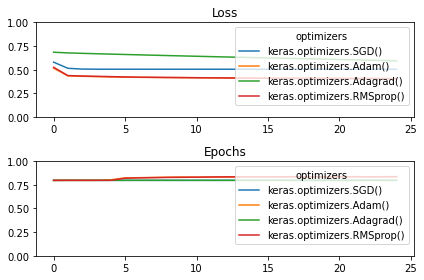

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Loss")
	
ax = plt.subplot(212)
historydf.xs('accuracy',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Accuracy")
plt.title("Epochs")

plt.tight_layout()

# Initializers

In [ ]:
dflist = []

initializers = ['zeros','uniform','normal','he_normal','lecun_uniform']

for init in initializers:

    k.clear_session()
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = init, activation = 'relu', input_dim = 10))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = init, activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = init, activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

    h = classifier.fit(X_train,y_train,epochs=25,batch_size=16,verbose=1)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))    


Epoch 1/25
500/500 [==============================] - 1s 1ms/step - loss: 0.6311 - accuracy: 0.7960
Epoch 2/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5521 - accuracy: 0.7960
Epoch 3/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5184 - accuracy: 0.7960
Epoch 4/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5087 - accuracy: 0.7960
Epoch 5/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5065 - accuracy: 0.7960
Epoch 6/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5060 - accuracy: 0.7960
Epoch 7/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5060 - accuracy: 0.7960
Epoch 8/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 9/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 10/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960

In [ ]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers,metrics_reported],names=['initializers','metric'])

historydf.columns = idx

print(historydf)

initializers     zeros            uniform  ... he_normal lecun_uniform          
metric            loss accuracy      loss  ...  accuracy          loss  accuracy
0             0.631118    0.796  0.544845  ...  0.750625      0.501850  0.781250
1             0.552062    0.796  0.440377  ...  0.801000      0.439684  0.802375
2             0.518410    0.796  0.435590  ...  0.804750      0.427487  0.810500
3             0.508678    0.796  0.432895  ...  0.811500      0.417325  0.823250
4             0.506461    0.796  0.430168  ...  0.822125      0.405647  0.831875
5             0.506003    0.796  0.426755  ...  0.828500      0.391846  0.839625
6             0.505952    0.796  0.424003  ...  0.829500      0.380245  0.845625
7             0.505937    0.796  0.421962  ...  0.832125      0.371539  0.849000
8             0.505935    0.796  0.420541  ...  0.834875      0.365657  0.851750
9             0.505940    0.796  0.419033  ...  0.837000      0.362119  0.853250
10            0.505935    0.

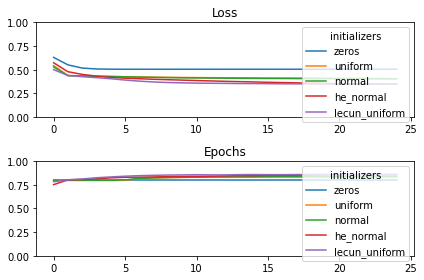

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Loss")
	
ax = plt.subplot(212)
historydf.xs('accuracy',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Accuracy")
plt.title("Epochs")

plt.tight_layout()